# 2.1 Introduction

경제학에서 가장 흥미있는 유용한 데이터 세트는 다른 국가간의 상업적 거래임.

Trade에서 다른 국가를 vertices로, 특정 해의 trade exchange를 directed egde로 정의

데이터 분석에 다음과 같은 문제가 있음.

1. 세부 사항이 증가함에 따라 데이터 크기가 증가.

2. 생산 제품, 무역량과 국가의 수는 해마다 바뀜.

본 챕터의 응용 사항

1. trade에 따른 다른 국가 간에 관계 분석

2. vertices(국가)가 다른 나라의 edge(상품)에 의해 연결된 곳에서 multinetwork로서 시스템을 대표함

3. Nc(국가의 수) X Np(상품 수) 크기인 non-square matrix

코드, 자료, 링크는 http://book.complexnetworks.net 에서 가능

(git clone https://github.com/datascienceandcomplexnetworks/book_code.git)

# 2.2 Data from COMTRADE

## Comtrade부터 데이터 세트 다운로드
### [Comtrade] (http://comtrade.un.org/) 웹 사이트에서 시작하여 국제 무역 관련 데이터 세트를 다운로드 할 수 있음
### 다음 경로를 통해 [Express Selection](http://comtrade.un.org/db/dqQuickQuery.aspx) ([instructions](http://unstats.un.org/unsd/tradekb/Knowledgebase/How-to-use-the-Express-Selection-feature-in-the-Data-Query)) interface 를 시작할 수 있음: 
* comtrade.un.org/Legacy Annual 
* data/Data Query/Express Selection

### 특정 해 (여기서는 2003년)에 대한 '모든' 국가에 대한 '전체' 거래과 관련된  Comtrade를 얻을 수 있음 ('수입'과 '수출')
### (특정 제품에 대해서 특정 코드를 넣는다. 예를 들어 무기는 93)

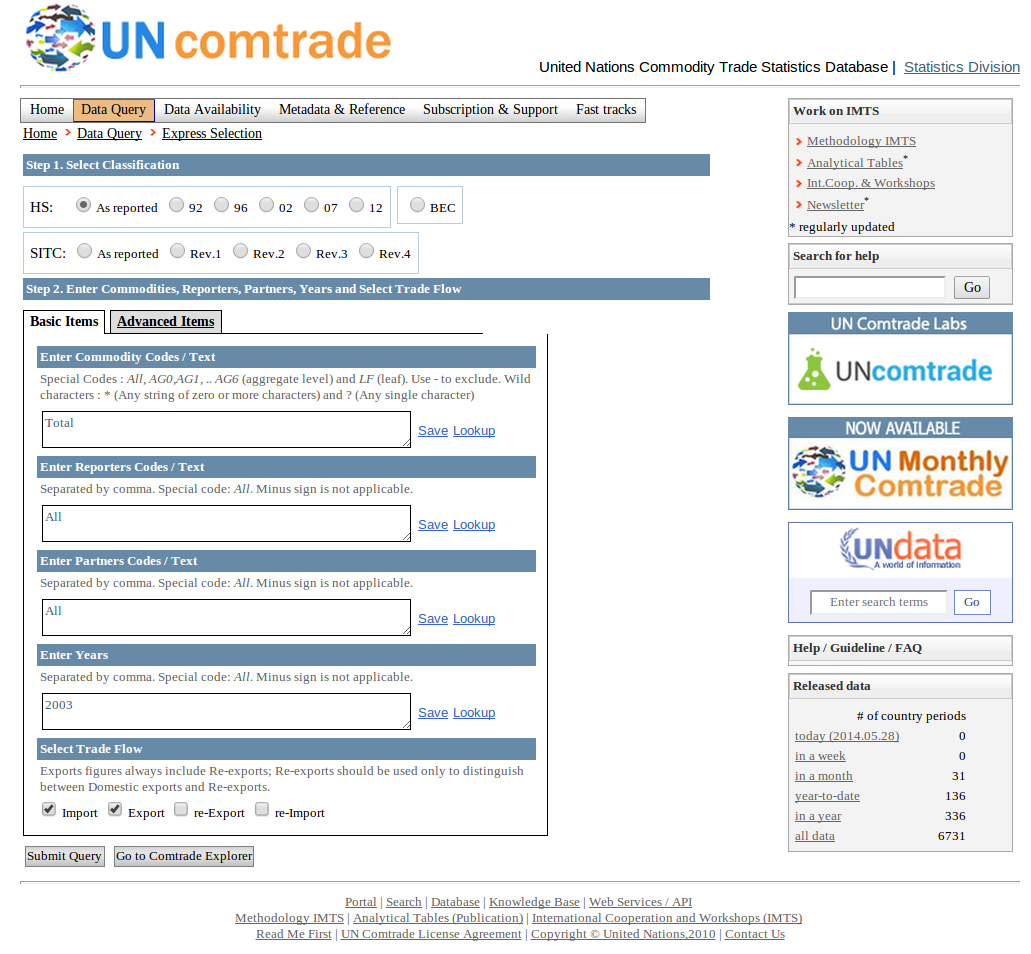

In [2]:
from IPython.display import Image
Image(filename='figs/comtrade_query_interface.png')

### 다운로드 페이지에서 'Direct Download' 링크를 통해 모든 데이터가 포함 된 CSV 파일을 가져올 수 있음.

쿼리 당 50,000 데이터를 다운로드 가능함

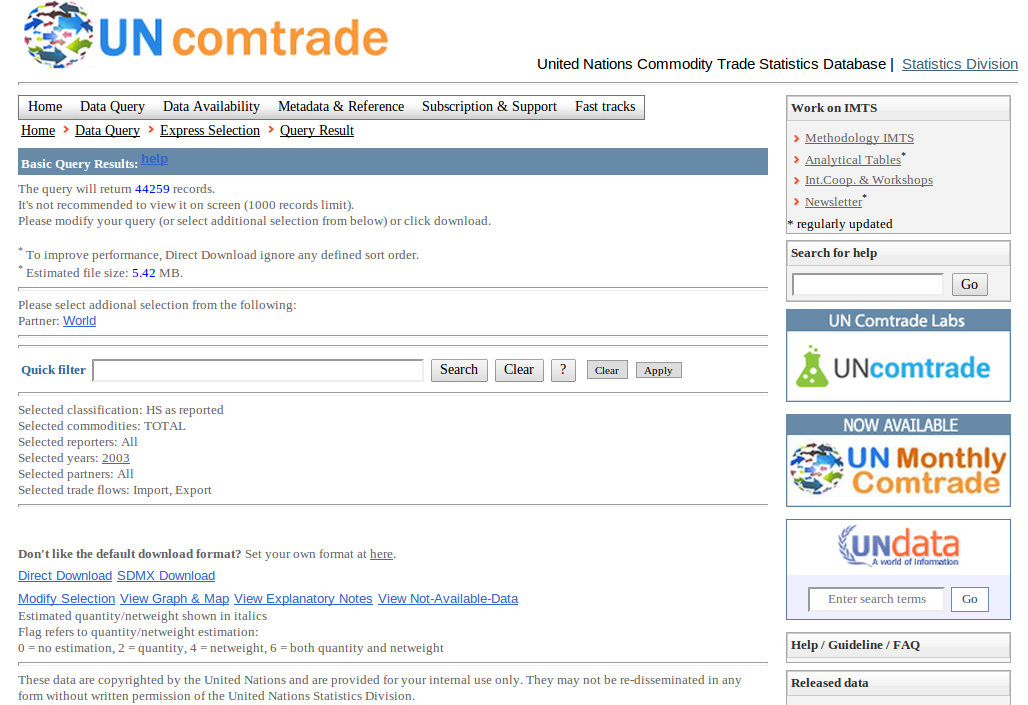

In [3]:
Image(filename='figs/comtrade_download_page.png')

- The international Centre has import/export databases publicly available at http://www.intracen.org/ByCountry.aspx

- The French research center in international economics (CEPII) published the BACI International Trade Database at the product level (Gaulier and Zignago, 2010)

- The World Organization (WTO) is developing a software to access COMTRADE and other data

- Journal of Conflict Resolution (Gleditsch,2002)

## 2.2.1 Product classification

United Nations Standard International Trade Classification (SITC)

0. Food and live animals

1. Beverages and tobacco

2. Crude materials,inedible,except fuels

3. Mineral fuels, lubricants, and related materials

4. Animal and vegetable oils, fats, and waxes

5. Chemicals and related products,n.e.s.

6. Manufactured goods classified chiefly by material

7. Machinery and transport equipment

8. Miscellaneous manufactured articles

9. Commodities and transactions not classified elsewhere in the SITC

In this classification,we have section 0 with nine divisions (01= “Meat and meat preparations"), a total of 36 groups (every division has some: 01 has for instance four different groups), 132 subgroups (01 has 17), and finally 335 basic headings. 

In [4]:
### 여기에 다운로드 된 데이터 파일이 있음

!ls data/comtrade_trade*

data/comtrade_trade_data_2003_product_09.csv
data/comtrade_trade_data_2003_product_10.csv
data/comtrade_trade_data_2003_product_27.csv
data/comtrade_trade_data_2003_product_29.csv
data/comtrade_trade_data_2003_product_30.csv
data/comtrade_trade_data_2003_product_39.csv
data/comtrade_trade_data_2003_product_52.csv
data/comtrade_trade_data_2003_product_71.csv
data/comtrade_trade_data_2003_product_72.csv
data/comtrade_trade_data_2003_product_84.csv
data/comtrade_trade_data_2003_product_85.csv
data/comtrade_trade_data_2003_product_87.csv
data/comtrade_trade_data_2003_product_90.csv
data/comtrade_trade_data_2003_product_93.csv
data/comtrade_trade_data_total_2003.csv


In [5]:
### check the data file

!head data/comtrade_trade_data_2003_product_09.csv

## 2.2.2 Country Classification

International Organization for Standardization (ISO3166-1)

- Two-letter code (ISO3166-1 alpha-2): The same for the internet domains. (Italy -> IT,France -> FR,Gibraltar -> GI).
- Three-letter code (ISO3166-1 alpha-3): Better visualization (Italy -> ITA, France -> FRA, Gibraltar -> GIB).
- Three-digit numeric (ISO3166-1 numeric): The most practical for countries not using the latin alphabet. (Italy -> 380, France -> 250, Gibraltar -> 292).

## 데이터를 로딩할때 제외할 특정 '국가'

* 472	Africa CAMEU region, nes
* 899	Areas, nes
* 471	CACM, nes
* 129	Caribbean, nes
* 221	Eastern Europe, nes
* 97	 EU-27
* 697	Europe EFTA, nes
* 492	Europe EU, nes
* 838	Free Zones
* 473	LAIA, nes
* 536	Neutral Zone
* 637	North America and Central America, nes
* 290	Northern Africa, nes
* 527	Oceania, nes
* 577	Other Africa, nes
* 490	Other Asia, nes
* 568	Other Europe, nes
* 636	Rest of America, nes
* 839	Special Categories
* 879	Western Asia, nes
* 0      World

# 2.3 Projecting and symmetrising a bipartite network

contries: verticses

total export from country $i$ and $j$: weighted edge

adjacency matrices $A^I$ and $A^E$ for imports and exports

i -> j : export from i to j, j <- i : import j from i => 동일하지 않음

$$A^E_{ij} != A^I_{ji}$$

특정 국가의 상품 계산, WTW 분석은 두 데이터 세트의 symmetrisation(대칭)에 의해 구해짐

(2.1)

$$A^I_{ij} = 1/2(A^I_{ij}+A^E_{ji})$$

$$A^E_{ij} = 1/2(A^E_{ij}+A^I_{ji})$$

(2.2)

$$A^I_{ij} = A^E_{ji}$$

$$A^E_{ij} = A^I_{ji}$$

In [6]:
def net_symmetrisation(wtn_file, exclude_countries):
    DG=nx.DiGraph()
    
    Reporter_pos=1
    Partner_pos=3
    Flow_code_pos=2
    Value_pos=9
    
    dic_trade_flows={}
    hfile=open(wtn_file,'r')
    
    header=hfile.readline()
    lines=hfile.readlines()
    for l in lines:
        l_split=l.split(',')
        #the following is to prevent parsing lines without data
        if len(l_split)<2: continue 
        reporter=int(l_split[Reporter_pos])
        partner=int(l_split[Partner_pos])
        flow_code=int(l_split[Flow_code_pos])
        value=float(l_split[Value_pos])
        
        if ( (reporter in exclude_countries) or \
            (partner in exclude_countries) or (reporter==partner) ): 
            continue
        
        if flow_code==1 and value>0.0:
            #1=Import, 2=Export
            if dic_trade_flows.has_key((partner,reporter,2)): 
                DG[partner][reporter]['weight']= \
                (DG[partner][reporter]['weight']+value)/2.0
            else:
                DG.add_edge(partner, reporter, weight=value)
                dic_trade_flows[(partner,reporter,1)]= \
                value #this is to mark the exixtence of the link
        
        elif flow_code==2 and value>0.0:
            #1=Import, 2=Export
            if dic_trade_flows.has_key((reporter,partner,1)): 
                DG[reporter][partner]['weight']= \
                (DG[reporter][partner]['weight']+value)/2.0
            else:
                DG.add_edge(reporter, partner, weight=value)
                #this is to mark the exixtence of the link
                dic_trade_flows[(reporter,partner,2)]=value 
        else:
            print "trade flow not present\n"
        
    hfile.close()
    
    return DG

## aggregate network 생성

1. 최근 접근은 importer에 의해 보고되는 trade flow의 값을 사용

2. time evolution을 고려: 2차 세계 대전 후와 1990년대에 새로운 국가가 생산과 수출을 함. 1992년에서 2002년까지 COMRADE 데이터에서 N=162 국가의 패널을 사용


- 무역 채널의 구조는 경제 파트너와 전체 무역의 수의 skew된 분포를 가진 다른 네트워크와 유사함

- $k = k_{in} + k_{out}$ 인 전체 degree의 degree distribution P(k) 는 fat-tailed distribution을 가짐.

- 국가의 degree (unweighted network를 위한 무역 파트너의 수) 는 1인당 GDP와 비례

- 위에 따라 무역의 진화를 모델 하기 위한 GDP분포에 기반한 모델을 정의할 수 있음

- 모든 vertex에는 in과 out degree 사이의 강한 상관관계가 있음

- 다양한 국가에서 정의된 k의 degree인 vertex마다 clustering coeffieient, 즉 c(k)는 줄어든다. c=0.65: 비슷한 수의 edge와 vertex를 가진 random network보다 크기가 큼

- 한 국가의 이웃의 평균 degree는 국가의 degree와 함께 줄어든다.

In [7]:
#importing the main modules
import networkx as nx

In [8]:
#countries to be excluded
exclude_countries=[472 ,899 ,471 ,129 ,221 ,97 ,697 ,492 ,838 ,473 ,536 ,\
                   637 ,290 ,527 ,577 ,490 ,568 ,636 ,839 ,879 ,0]

In [9]:
#this is the magic command to have the graphic embedded #in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
DG=net_symmetrisation("data/comtrade_trade_data_total_2003.csv", \
                      exclude_countries)
print "number of nodes", DG.number_of_nodes()

number of nodes 232


In [11]:
print "number of edges", DG.number_of_edges()

number of edges 27901


# 2.4 Neighbour quantities: recipocity and assortativity

## 2.4.1 Reciprocity (상호상태)

방향이 있는 그래프에서 두개의 vertex간에 reciprocity: 두개의 vertex간에 양방향에서 edge를 가지는 확률을 측정, 경제학에서는 두 국가간의 경제가 얼마나 interconnect되어 있는지를 측정

We can define both the reciprocity in the unweighted case as: 
$$r=\frac{L^\leftrightarrow}{L}$$
where $${L^\leftrightarrow}$$ is the number of reciprocated links that for a connected network ammounts to $$2L-N(N-1)$$

In [12]:
#unweighted case
N=DG.number_of_nodes()
L=DG.number_of_edges()

r=float((2*L-N*(N-1)))/L

print r

0.079208630515


In the weighted case the formula changes in:
$$r=\frac{W^\leftrightarrow}{W}$$
where $$W^\leftrightarrow=\sum_i\sum_{j\neq i}w^\leftrightarrow_{ij}$$ is the sum of the reciprocated weights with $$w^\leftrightarrow_{ij}=min[w_{ij},w_{ji}]=w^\leftrightarrow_{ji}$$
and $$W=\sum_i\sum_{j\neq i}w_{ij}$$

In [13]:
#weighted case
W=0
W_rep=0
for n in DG.nodes():
    for e in DG.out_edges(n,data=True):
        W+=e[2]['weight']
        if DG.has_edge(e[1],e[0]):
            W_rep+=min(DG[e[0]][e[1]]['weight'],DG[e[1]][e[0]] \
                       ['weight'])
            
print W,W_rep,W_rep/W 

7.17766475925e+12 5.19627606057e+12 0.723950788293


## 2.4.2 Assortativity (분류)

Assortativity: vertex가 얼마나 유사/다른 degree 값을 가지고 연결되었는지 측정

https://en.wikipedia.org/wiki/Assortativity

(array([ 26.,  18.,  22.,  33.,  31.,  33.,  33.,  21.,  11.,   2.,   1.,
          1.]),
 array([ 244.2079646 ,  259.44063422,  274.67330383,  289.90597345,
         305.13864307,  320.37131268,  335.6039823 ,  350.83665192,
         366.06932153,  381.30199115,  396.53466077,  411.76733038,  427.        ]),
 <a list of 12 Patch objects>)

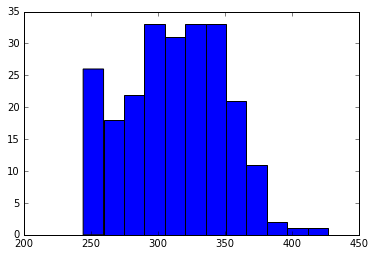

In [14]:
#K_nn distribution
list_Knn=[]
for n in DG.nodes():
    degree=0.0
    for nn in DG.neighbors(n):
        degree=degree+DG.degree(nn)
    list_Knn.append(degree/len(DG.neighbors(n)))

#plot the histogram    
hist(list_Knn,bins=12)

In [15]:
#basic Pearson correlation coefficient for the
r=nx.degree_assortativity_coefficient(DG)
print r #r<0: dissortativity

-0.335002643638


### assortativity Networkx의 weighted version을 계산하기 위해  추가 변수와 소스와 타겟 노드 모두를 위한 'out' 이나 'in' degree correlations 을 결정하기 위한 가능성이 필요하다 (the default is x='out',y='in')

In [16]:
#weighted version
r=nx.degree_pearson_correlation_coefficient(DG,weight='weight', \
                                            x='out',y='in')
print r

-0.0616530880377


# 2.5 Multigraphs

https://en.wikipedia.org/wiki/Multigraph

## Density and Strength (in and out)

### Loadging product Networks

In [17]:
dic_product_netowrks={}
commodity_codes=['09','10','27','29','30','39','52','71','72','84', \
'85','87','90','93']
for c in commodity_codes:
    dic_product_netowrks[c]=net_symmetrisation( \
    "data/comtrade_trade_data_2003_product_"+c+".csv", \
    exclude_countries)
    
DG_aggregate=net_symmetrisation( \
"data/comtrade_trade_data_total_2003.csv",exclude_countries)

### rescale the weighted ajacency aggregate matrix
$$w_{ij}^{tot}=\frac{ w_{ij}^{tot} }{ \sum_{hk}w_{hk}^{tot} }$$

In [18]:
w_tot=0.0
for u,v,d  in DG_aggregate.edges(data=True):
    w_tot+=d['weight']
for u,v,d  in DG_aggregate.edges(data=True):
    d['weight']=d['weight']/w_tot

### rescale the weighted ajacency product matrices
$$w_{ij}^c=\frac{w_{ij}^c}{\sum_{hk}w_{hk}^c}$$

In [19]:
for c in commodity_codes:
    l_p=[]
    w_tot=0.0
    for u,v,d  in dic_product_netowrks[c].edges(data=True):
        w_tot+=d['weight']
    for u,v,d  in dic_product_netowrks[c].edges(data=True):
        d['weight']=d['weight']/w_tot

### Generate the table with the quantities
$$Density\   w_{ij}\  NS_{in}/ND_{in}\  NS_{out}/ND_{out}$$

In [20]:
density_aggregate=DG_aggregate.number_of_edges() / \
(DG_aggregate.number_of_nodes()*(DG_aggregate.number_of_nodes()-1.0))

w_agg=[]
NS_in=[]
NS_out=[]
for u,v,d in DG_aggregate.edges(data=True):
    w_agg.append(d['weight'])
for n in DG_aggregate.nodes():
    if DG_aggregate.in_degree(n)>0:
        NS_in.append(DG_aggregate.in_degree(n,weight='weight')/ \
                     DG_aggregate.in_degree(n))
    if DG_aggregate.out_degree(n)>0:
        NS_out.append(DG_aggregate.out_degree(n,weight='weight')/ \
                      DG_aggregate.out_degree(n))
    
for c in commodity_codes:
    density_commodity=dic_product_netowrks[c].number_of_edges() / \
    (dic_product_netowrks[c].number_of_nodes()* \
    (dic_product_netowrks[c].number_of_nodes()-1.0))
    w_c=[]
    NS_c_in=[]
    NS_c_out=[]
    for u,v,d  in dic_product_netowrks[c].edges(data=True):
        w_c.append(d['weight'])
    for n in dic_product_netowrks[c].nodes():
        if dic_product_netowrks[c].in_degree(n)>0:
            NS_c_in.append(dic_product_netowrks[c].in_degree (n, \
            weight='weight')/dic_product_netowrks[c].in_degree(n))
        if dic_product_netowrks[c].out_degree(n)>0:
            NS_c_out.append(dic_product_netowrks[c].out_degree(n, \
            weight='weight')/dic_product_netowrks[c].out_degree(n))

    print c,str(round(density_commodity/density_aggregate,4))+ \
    " & "+str(round(mean(w_c)/mean(w_agg),4))+" & "+ \
    str(round(mean(NS_c_in)/mean(NS_in),4))+" & "+ \
    str(round(mean(NS_c_out)/mean(NS_out),4))



09 0.309 & 3.3811 & 2.553 & 2.3906
10 0.1961 & 5.5195 & 5.9919 & 2.5718
27 0.3057 & 3.3575 & 2.6786 & 3.2979
29 0.3103 & 3.3664 & 2.3579 & 1.6286
30 0.3662 & 2.803 & 2.3308 & 1.267
39 0.4926 & 2.0478 & 1.753 & 1.1385
52 0.2864 & 3.5839 & 2.7572 & 2.1254
71 0.2843 & 3.6746 & 1.9479 & 2.6704
72 0.3081 & 3.3315 & 2.5847 & 1.8484
84 0.6195 & 1.6281 & 1.3359 & 1.0259
85 0.5963 & 1.6917 & 1.3518 & 1.0692
87 0.4465 & 2.259 & 1.7488 & 1.1105
90 0.4734 & 2.1492 & 1.5879 & 1.0993
93 0.1415 & 8.4677 & 6.0618 & 4.0279


# 2.6 The bioartie network of products and countries

https://en.wikipedia.org/wiki/Bipartite_network_projection

https://en.wikipedia.org/wiki/Bipartite_graph

https://www.caida.org/publications/presentations/2011/dances_hms_bipartite/dances_hms_bipartite.pdf

## Revealed Comparative Advantage

In [21]:
def RCA(c,p):
    X_cp=dic_product_netowrks[p].out_degree(c,weight='weight')
    X_c=DG_aggregate.out_degree(c,weight='weight')
    
    X_p=0.0
    for n in dic_product_netowrks[p].nodes():
        X_p+=dic_product_netowrks[p].out_degree(n,weight='weight')
    
    X_tot=0.0
    for n in DG_aggregate.nodes():
        X_tot+=DG_aggregate.out_degree(n,weight='weight')
    
    RCA_cp=(X_cp/X_c)/(X_p/X_tot)
    
    return RCA_cp

p='93'
c=381
print RCA(c,p)

2.10470555164


## Bipartite Network
### defining the country-product matrix

In [22]:
import numpy as np

num_countries=DG_aggregate.number_of_nodes()
num_products=len(commodity_codes)

#generate array indices
country_index={}
i=0
for c in DG_aggregate.nodes():
    country_index[c]=i
    i+=1

M=np.zeros((num_countries,num_products))

for pos_p,p in enumerate(commodity_codes):
    for c in dic_product_netowrks[p].nodes():
        if RCA(c,p)>1.0:
            M[country_index[c]][pos_p]=1.0
    print "\r"
    
C=np.dot(M,M.transpose())
P=np.dot(M.transpose(),M)

print C
print P















[[ 2.  1.  1. ...,  0.  1.  1.]
 [ 1.  4.  2. ...,  0.  3.  1.]
 [ 1.  2.  3. ...,  0.  2.  1.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 1.  3.  2. ...,  0.  4.  1.]
 [ 1.  1.  1. ...,  0.  1.  2.]]
[[ 83.  27.  28.   4.   6.   6.  29.  31.  20.   1.   3.   3.   5.  12.]
 [ 27.  59.  19.   4.   4.   8.  27.  18.  19.   5.   3.   7.   3.  12.]
 [ 28.  19.  71.   4.   2.   7.  20.  16.  14.   3.   4.   4.   1.   9.]
 [  4.   4.   4.  20.   9.   9.   2.   6.   5.   5.   4.   3.   7.   7.]
 [  6.   4.   2.   9.  27.  15.   7.   6.  10.   9.   3.   8.   9.  10.]
 [  6.   8.   7.   9.  15.  37.  10.   7.  15.  10.  10.   8.   9.  11.]
 [ 29.  27.  20.   2.   7.  10.  69.  19.  18.   4.   5.   7.   5.  14.]
 [ 31.  18.  16.   6.   6.   7.  19.  57.  10.   4.   3.   4.   6.   9.]
 [ 20.  19.  14.   5.  10.  15.  18.  10.  56.   7.   7.  12.   2.  15.]
 [  1.   5.   3.   5.   9.  10.   4.   4.   7.  26.  12.   9.   7.   6.]
 [  3.   3.   4.   4.   3.  10.   5.   3.   7.  12.  26.